# Numpy, Pandas, and Matplotlib

Python has two modules that are commonly used to handle data, [`numpy`](https://numpy.org) (Numeric Python) and [`pandas`](https://pandas.pydata.org) (Python and data analysis). We will also do some basic data visualization with [`matplotlib`](https://matplotlib.org), a powerful and commonly used graphics library patterned on MATLAB plotting functions.

If you do not already have these libraries installed, you can use:

    pip install numpy
    pip install pandas
    pip install matplotlib

OR

    conda install numpy
    conda install pandas
    conda install matplotlib

## NumPy

In [32]:
import numpy as np

**1. Create a numpy array with the integers from 1-15, inclusively, and assign it to the variable `a`.**

In [33]:
# YOUR CODE HERE
easy_list = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]
a = np.array(easy_list)

In [34]:
print(a)

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15]


**2. Reshape the array so it is 5 x 3.**

In [35]:
# YOUR CODE HERE
a = a.reshape((5,3))

In [36]:
print(a.shape)
print(a)

(5, 3)
[[ 1  2  3]
 [ 4  5  6]
 [ 7  8  9]
 [10 11 12]
 [13 14 15]]


**3. Use a for-loop to multiply the 3rd row by 2. Print the array again.**

In [37]:
# YOUR CODE HERE
for i in range(len(a)):
  if i == 2:
    print('Original')
    print(a)
    print('-------------------')
    print('Modified')
    a[i] = a[i] * 2
    print(a)

Original
[[ 1  2  3]
 [ 4  5  6]
 [ 7  8  9]
 [10 11 12]
 [13 14 15]]
-------------------
Modified
[[ 1  2  3]
 [ 4  5  6]
 [14 16 18]
 [10 11 12]
 [13 14 15]]


In [38]:
print(a)

[[ 1  2  3]
 [ 4  5  6]
 [14 16 18]
 [10 11 12]
 [13 14 15]]


**4. Now use *slicing* and *broadcasting* to multiply the first column by 2 without a loop.**

In [39]:
# YOUR CODE HERE
# this splits it up so I grab all rows of the first two columns
## that what the ':' is for al rows
## the [0] is for the first columns
## a[:, [0]] grabs all rows in the first column
a[:, [0]] = a[:, [0]] * 2

In [40]:
print(a)

[[ 2  2  3]
 [ 8  5  6]
 [28 16 18]
 [20 11 12]
 [26 14 15]]


### Pandas

- Best at keeping datasets labeled, and good if you have several types of data in your dataset (that is, integer, float, string, etc.)
- The basic data structure is a `DataFrame`, which is a table, similar to an Excel spreadsheet.

In [41]:
import pandas as pd

# this is google collab stuff I need to add to access the files on my gdrive
import os
from google.colab import drive
drive.mount('/content/drive/')
os.chdir("/content/drive/My Drive/NIH_FAES/SPRING_2025/BIO_509_Machine_Learning_Class/Week_1")

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


**5. Load `toy_dataset.csv` into the variable `df`.**
- Hint: file paths will be relative to this notebook, so it is easiest to have the both files in the same folder.

In [42]:
# YOUR CODE HERE
df = pd.read_csv('toy_dataset.csv')

In [43]:
display(df)

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,63.027817,22.552586,39.609117,40.475232,98.672917,-0.254400,Abnormal
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,Abnormal
2,NaN,22.218482,50.092194,46.613539,105.985135,-3.530317,Abnormal
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,Abnormal
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,Abnormal
...,...,...,...,...,...,...,...
305,47.903565,13.616688,36.000000,34.286877,117.449062,-4.245395,Normal
306,53.936748,20.721496,29.220534,33.215251,114.365845,-0.421010,Normal
307,61.446597,22.694968,46.170347,38.751628,125.670725,-2.707880,Normal
308,45.252792,8.693157,41.583126,36.559635,118.545842,0.214750,Normal


**6. Use conditional indexing to select values in 'pelvic_incidence' for rows with class "Normal" without a loop. Store them in the variable `norm_inc`.**

In [44]:
# YOUR CODE HERE
norm_inc = df['pelvic_incidence'][df['class'] == 'Normal']

In [45]:
display(norm_inc)

,pelvic_incidence
210,38.505273
211,54.920858
212,44.362490
213,48.318931
214,45.701789
...,...
305,47.903565
306,53.936748
307,61.446597
308,45.252792


Notice that some `pelvic_incidence` values are missing. These appear as `NaN`. Let's find them.


In [46]:
df[df['pelvic_incidence'].isna()]

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
2,NaN,22.218482,50.092194,46.613539,105.985135,-3.530317,Abnormal
10,NaN,13.040974,31.334500,36.665635,108.648265,-7.825986,Abnormal
101,NaN,18.774071,63.311835,61.164499,114.787107,38.538741,Abnormal
173,NaN,9.064729,56.300000,41.760300,78.999454,23.041524,Abnormal
255,NaN,14.655042,58.001429,52.883139,123.632260,25.970206,Normal
271,NaN,16.541216,42.000000,25.974394,120.631941,7.876731,Normal


**7. Use the Pandas [`fillna()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.fillna.html) function to replace the missing `pelvic_incidence` values in `df` with the median value of the `pelvic_incidence` column.**
- Hint: by default, the `inplace` argument is False, meaning `fillna()` will return a new dataframe with the missing values filled, rather than changing the data frame it is called from.

In [47]:
# YOUR CODE HERE
df['pelvic_incidence'] = df['pelvic_incidence'].fillna(df['pelvic_incidence'].median())

Check a row that had a missing value:

In [48]:
df.iloc[2]

,2
pelvic_incidence,58.691038
pelvic_tilt numeric,22.218482
lumbar_lordosis_angle,50.092194
sacral_slope,46.613539
pelvic_radius,105.985135
degree_spondylolisthesis,-3.530317
class,Abnormal


## Matplotlib

In [49]:
import matplotlib.pyplot as plt

**8. Create a basic plot of the 2nd column of our NumPy array `a`.**

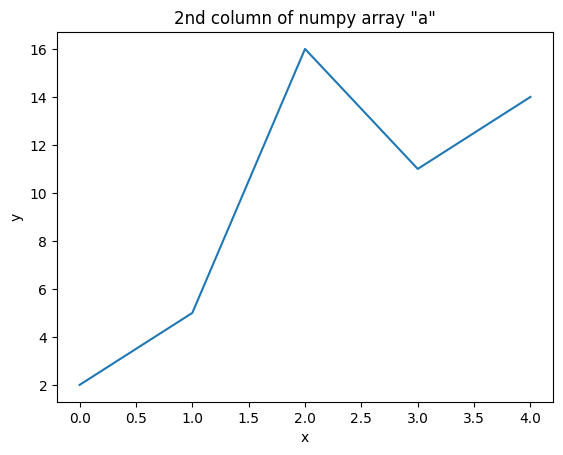

In [50]:
# YOUR CODE HERE
thing = a[:, [1]]
# print(a)
# print('=================================')
# print(thing)
### x, y set up
x = np.arange(0, 5, 1)
y = list(a[:, [1]])

# plot
plt.plot(x, y)
plt.xlabel('x')
plt.ylabel('y')
plt.title('2nd column of numpy array "a"')
plt.show()

**9. Make a scatterplot of 'pelvic_incidence' (x) vs. 'lumbar_lordosis_angle' (y).**

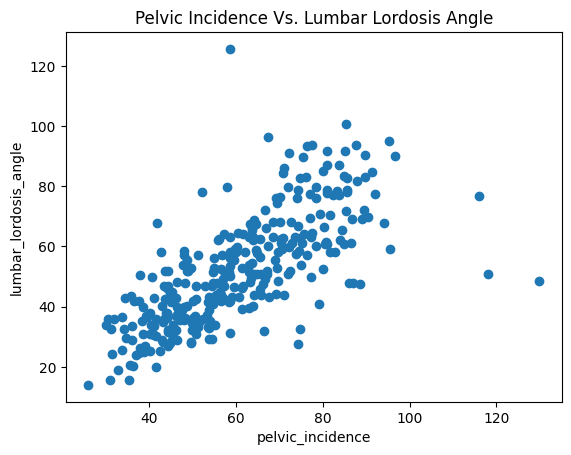

In [51]:
# YOUR CODE HERE
### x, y set up
x = np.array(df['pelvic_incidence'])
y = np.array(df['lumbar_lordosis_angle'])

### label set up
plt.xlabel('pelvic_incidence')
plt.ylabel('lumbar_lordosis_angle')
plt.title('Pelvic Incidence Vs. Lumbar Lordosis Angle')

### scatter plot set up
plt.scatter(x, y)

### plot activate
plt.show()

In [51]:
# completed by Jonathan "Johnny" Uriarte-Lopez